<a href="https://colab.research.google.com/github/jamahalwin/chicago-crime-analysis/blob/master/ML_Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chicago Crime Analysis

In [0]:
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
dataset_path =  keras.utils.get_file('chicago-crime-sample', 'https://raw.githubusercontent.com/jamahalwin/chicago-crime-analysis/master/Chicago_Crimes_Project_Data.csv')

In [0]:
raw_dataset = pd.read_csv(dataset_path,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

dataset = raw_dataset.copy()

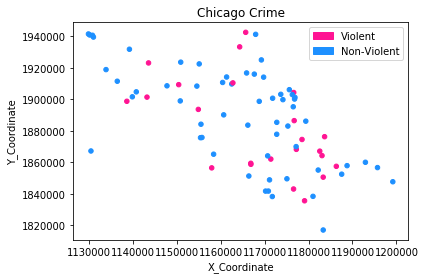

In [31]:
colors = np.where(dataset["Violent"]==1,'deeppink','dodgerblue')

dataset.plot(kind='scatter',x='X_Coordinate',y='Y_Coordinate', color=colors, title='Chicago Crime')

violent_patch = mpatches.Patch(color='deeppink', label='Violent')
non_violent_patch = mpatches.Patch(color='dodgerblue', label='Non-Violent')
plt.legend(handles=[violent_patch, non_violent_patch])

plt.show()